In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
from catboost import CatBoostRegressor

In [5]:
from xgboost import XGBRegressor

In [6]:
data = pd.read_csv('data/smartwatches_cleaned.csv')

In [7]:
data.shape

(388, 35)

In [8]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# data.head()

In [10]:
X = data.drop(['Discount Price'], axis=1)
y = data['Discount Price']

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'train_df: {X_train.shape}')
print(f'test_df: {X_test.shape}')
print(f'train_target: {y_train.shape}')
print(f'test_target: {y_test.shape}')

train_df: (310, 33)
test_df: (78, 33)
train_target: (310,)
test_target: (78,)


In [11]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    CatBoostRegressor(verbose=0),
    XGBRegressor()
]

In [12]:
results = {}

for regressor in regressors:
    model_name = regressor.__class__.__name__
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    # Calculate metrics
    mae = mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")
    print()

LinearRegression:
  MAE: 10470626.931581166
  MSE: 10470626.931581166
  R2: 0.2471201179857736

DecisionTreeRegressor:
  MAE: 8441587.012820512
  MSE: 8441587.012820512
  R2: 0.3930161894073527

RandomForestRegressor:
  MAE: 3327822.492734615
  MSE: 3327822.492734615
  R2: 0.7607162759149152

GradientBoostingRegressor:
  MAE: 4470004.9909029845
  MSE: 4470004.9909029845
  R2: 0.6785887939523945

CatBoostRegressor:
  MAE: 2346303.5783844753
  MSE: 2346303.5783844753
  R2: 0.8312914047261443

XGBRegressor:
  MAE: 2515564.612938577
  MSE: 2515564.612938577
  R2: 0.819120860540262



### We will use GradientBoostingRegressor

In [13]:
import joblib 

In [14]:
final = GradientBoostingRegressor()
final.fit(X, y)

GradientBoostingRegressor()

In [15]:
joblib.dump(final, 'models/final_model.pkl')

['models/final_model.pkl']

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

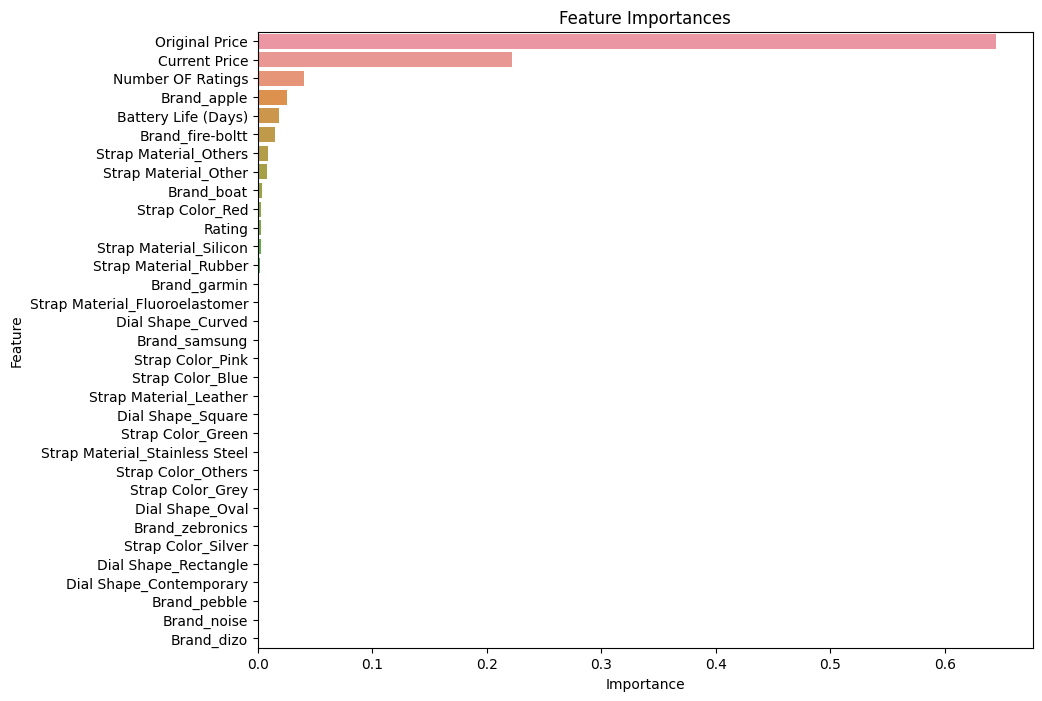

In [21]:
model = joblib.load('models/final_model.pkl')

# Extract feature importances
feature_importances = model.feature_importances_
features = model.feature_names_in_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()